In [1]:
import numpy as np
import os

# this is for loading the data
def load_fall_X(file_name):
    temp = np.memmap(file_name, dtype='float32', mode='r')
    X = np.reshape(temp, [-1, 256, 6])
    return X

# this is for loading the labels (one-hot encoding: [1, 0, 0]-->nonfall, [0, 1, 0]-->pre-impact fall, [0, 0, 1]-->fall	
def load_fall_y(file_name):
    temp = np.memmap(file_name, dtype='int8', mode='r')
    y= np.reshape(temp, [-1, 3])
    return y

def dset_fpath(fname):
    return os.path.abspath("data/pre-processed_dataset/%s" % fname)

In [2]:
test  = {'X': {}, 'y': {}}
train = {'X': {}, 'y': {}}
for i in range(5):
    test['X'][i] = load_fall_X(dset_fpath("test_x_%i" % i))
    test['y'][i] = load_fall_y(dset_fpath("test_y_%i" % i))
    train['X'][i] = load_fall_X(dset_fpath("train_x_%i" % i))
    train['y'][i] = load_fall_y(dset_fpath("train_y_%i" % i))

In [3]:
for i in range(5):
    print("Set", i)
    print(" X train shape:", train['X'][i].shape)
    print(" y train shape:", train['y'][i].shape)
    print(" X test shape: ", test['X'][i].shape)
    print(" y test shape: ", test['y'][i].shape)

Set 0
 X train shape: (75025, 256, 6)
 y train shape: (75025, 3)
 X test shape:  (19064, 256, 6)
 y test shape:  (19064, 3)
Set 1
 X train shape: (73347, 256, 6)
 y train shape: (73347, 3)
 X test shape:  (20742, 256, 6)
 y test shape:  (20742, 3)
Set 2
 X train shape: (73534, 256, 6)
 y train shape: (73534, 3)
 X test shape:  (20555, 256, 6)
 y test shape:  (20555, 3)
Set 3
 X train shape: (77296, 256, 6)
 y train shape: (77296, 3)
 X test shape:  (16793, 256, 6)
 y test shape:  (16793, 3)
Set 4
 X train shape: (77154, 256, 6)
 y train shape: (77154, 3)
 X test shape:  (16935, 256, 6)
 y test shape:  (16935, 3)


In [80]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

n_timesteps = 256
n_features = 6
n_outputs = 3

model = models.Sequential()

# First layer
model.add(layers.Conv1D(kernel_size=3, 
                        filters=64, 
                        activation='relu', 
                        input_shape=(n_timesteps, n_features)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(2))

# Second layer
model.add(layers.Conv1D(kernel_size = 3, 
                        filters = 64, 
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(2))


# Third layer
model.add(layers.Conv1D(kernel_size = 3, 
                        filters = 64, 
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(2))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dense(n_outputs, activation='softmax'))

opt = optimizers.Adam(learning_rate=0.0005)

print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_51 (Conv1D)           (None, 254, 64)           1216      
_________________________________________________________________
batch_normalization_51 (Batc (None, 254, 64)           256       
_________________________________________________________________
max_pooling1d_54 (MaxPooling (None, 127, 64)           0         
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 125, 64)           12352     
_________________________________________________________________
batch_normalization_52 (Batc (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_55 (MaxPooling (None, 62, 64)            0         
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 60, 64)          

In [81]:
i=0
X_train, y_train = train['X'][i], train['y'][i]
X_test, y_test = test['X'][i], test['y'][i]
history = model.fit(X_train, y_train, epochs = 30, batch_size = 64 )

Epoch 1/30
1173/1173 [==============================] - 30s 26ms/step - loss: 0.1969 - accuracy: 0.9682
Epoch 2/30
1173/1173 [==============================] - 30s 25ms/step - loss: 0.0697 - accuracy: 0.9820
Epoch 3/30
1173/1173 [==============================] - 29s 25ms/step - loss: 0.0611 - accuracy: 0.9829
Epoch 4/30
1173/1173 [==============================] - 29s 24ms/step - loss: 0.0591 - accuracy: 0.9827
Epoch 5/30
1173/1173 [==============================] - 29s 24ms/step - loss: 0.0533 - accuracy: 0.9841
Epoch 6/30
1173/1173 [==============================] - 29s 25ms/step - loss: 0.0503 - accuracy: 0.9845
Epoch 7/30
1173/1173 [==============================] - 29s 25ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 8/30
1173/1173 [==============================] - 28s 24ms/step - loss: 0.0426 - accuracy: 0.9868
Epoch 9/30
1173/1173 [==============================] - 28s 24ms/step - loss: 0.0399 - accuracy: 0.9872
Epoch 10/30
1173/1173 [==============================] - 29s 24m

In [82]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)

596/596 - 3s - loss: 0.1653 - accuracy: 0.9838


KeyError: 'val_accuracy'

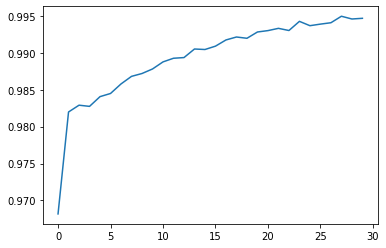

In [83]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [84]:
y_pred = model.predict(X_test)

In [85]:
y_pred

array([[9.9999976e-01, 1.8367679e-07, 1.9128464e-10],
       [9.9995530e-01, 3.7284877e-08, 4.4650358e-05],
       [9.9999988e-01, 1.7493066e-07, 4.3041200e-13],
       ...,
       [9.9999559e-01, 4.4324811e-06, 1.7954287e-09],
       [9.9999845e-01, 1.4911587e-06, 1.3082690e-09],
       [9.9998975e-01, 1.0211564e-05, 9.7351716e-10]], dtype=float32)

In [86]:
y_pred_max = np.argmax(y_pred, axis=1)
y_test_max = np.argmax(y_test, axis=1)

In [87]:
y_test

memmap([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]], dtype=int8)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_max, y_pred_max)

array([[18598,    54,    29],
       [  174,    58,     1],
       [   46,     5,    99]])

In [89]:
print(classification_report(y_test_max, y_pred_max, target_names=['no fall', 'pre-fall', 'fall']))

              precision    recall  f1-score   support

     no fall       0.99      1.00      0.99     18681
    pre-fall       0.50      0.25      0.33       233
        fall       0.77      0.66      0.71       150

    accuracy                           0.98     19064
   macro avg       0.75      0.63      0.68     19064
weighted avg       0.98      0.98      0.98     19064



Metrics
\begin{align}
\text{Sensitivity} &= \frac{\text{TP}}{\text{TP} + \text{FN}} \\
\text{Specificity} &= \frac{\text{TN}}{\text{TN} + \text{FP}} \\
\text{Accuracy} &= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{TN} + \text{FN}} \\
\end{align}

In [108]:
def truth_test(_test,_pred, i):
    _test = np.array(_test)
    _pred = np.array(_pred)
    
    _pred_pos = _test[_pred == i]
    _pred_neg = _test[_pred != i]
    
    _true_pos = len(_pred_pos[_pred_pos == i])
    _fals_pos = len(_pred_pos[_pred_pos != i])
    
    _true_neg = len(_pred_neg[_pred_neg != i])
    _fals_neg = len(_pred_neg[_pred_neg == i])
    
    return _true_pos, _fals_pos, _true_neg, _fals_neg

def sensitivity(_test,_pred, i):
    tp, fp, tn, fn = truth_test(_test, _pred, i)
    return tp / ( tp + fn)

def specificity(_test,_pred, i):
    tp, fp, tn, fn = truth_test(_test, _pred, i)
    return tn / ( tn + fp)

def accuracy(_test, _pred, i):
    tp, fp, tn, fn = truth_test(_test, _pred, i)
    return (tp+tn) / (tp + fp + tn + fn)

In [113]:
for i in range(3):
    print(" Label", i)
    print("    accuracy\t%5.3f"%accuracy(y_test_max, y_pred_max, i))
    print(" specificity\t%5.3f"%specificity(y_test_max, y_pred_max, i))
    print(" sensitivity\t%5.3f"%sensitivity(y_test_max, y_pred_max, i))

 Label 0
    accuracy	0.984
 specificity	0.426
 sensitivity	0.996
 Label 1
    accuracy	0.988
 specificity	0.997
 sensitivity	0.249
 Label 2
    accuracy	0.996
 specificity	0.998
 sensitivity	0.660


## Now for the hybrid model...

In [79]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

n_timesteps = 256
n_features = 6
n_outputs = 3

model = models.Sequential()

# First layer
model.add(layers.Conv1D(kernel_size=3, 
                        filters=64, 
                        activation='relu', 
                        input_shape=(n_timesteps, n_features)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(2))

# Second layer
model.add(layers.Conv1D(kernel_size = 3, 
                        filters = 64, 
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(2))


# Third layer
model.add(layers.Conv1D(kernel_size = 3, 
                        filters = 64, 
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(2))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dense(n_outputs, activation='softmax'))

opt = optimizers.Adam(learning_rate=0.0005)

print(model.summary())


model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 254, 64)           1216      
_________________________________________________________________
batch_normalization_48 (Batc (None, 254, 64)           256       
_________________________________________________________________
max_pooling1d_51 (MaxPooling (None, 127, 64)           0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 125, 64)           12352     
_________________________________________________________________
batch_normalization_49 (Batc (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 62, 64)            0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 60, 64)          

In [114]:
model.save("cnn_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: cnn_model/assets
